# Regresión Lineal

## Introducción

En sus inicios, a comienzos del siglo XIX, la primera aproximación a la regresión lineal fue en base a los trabajos que se habian realizado del método de los mínimos cuadrádos, Legendre 1805, método que básicamente consiste en encontrar una función continua, dentro de un conjunto de puntos o pares ordenados a una familia de funciones escogiendo la familia o función que mejor se aproxime a los datos. Carl Fridrich Gauss publicó un trabajo donde desarrollaba de manera más profunda el método de los mínimos cuadrados.

De manera general, una regresion lineal, es un metodo matemático para  para aproximar la relación de dependencia entre una variable dependiente ${\displaystyle Y}$, junto con $m$ variables independientes ${\displaystyle X_{i}}$, mas un termino asociado a la variabilidad del modelo, que corresponde al térmono del error $\epsilon$.  [Regresión-lineal-Wikypedia](https://es.wikipedia.org/wiki/Regresi%C3%B3n_lineal)

## Planteamiento del Algortimo

El modelo de regresión lineal simple, es un modelo con un solo regresor $x$ que tiene una relación con una respuesta $y$, donde la relación es una línea recta cuyo modelo es; 
$y=\beta_{0}+\beta_{1} x+\varepsilon$

Donde; $\beta_{0}$ es la ordenada al origen, $\beta_{1}$ corresponde a la pendiente del modelo, los cuales son parámetros desconocidos que deben ser estimados, $\varepsilon$ corresponde al componente aleatorio del error. 
Se asume que los errores tienen promedio cero y varianza $\sigma^2$ desconocida ademas estos errores son no correlacionados.


## Estimación de los parámetros $\beta_{0} y  \beta_{1}$

Para estimar tales parámetros se usa el método de mínimos cuadrados. Esto es, se estiman $\beta_{0} y  \beta_{1}$ de modo que la suma de los cuadrados de las diferencias entre las observaciones $y_{i}$ y la línea recta sea mínima.

El criterio de mínimos cuadrados es el siguiente:

$S\left(\beta_{0}, \beta_{1}\right)=\sum_{i=1}^{n}\left(y_{i}-\beta_{0}-\beta_{1} x_{i}\right)^{2}$

Los estimadores, por mínimos cuadrados, de $\beta_{0}$, $\beta_{1}$ se notan de la siguiente manera; $\hat{\beta_{0}}$, $\hat{\beta_{1}}$ y deben satisfacer lo siguiente:

$\begin{aligned}
&\left.\frac{\partial S}{\partial \beta_{0}}\right|_{\hat{\beta}_{0} . \hat{\beta}_{1}}=-2 \sum_{i=1}^{n}\left(y_{i}-\dot{\beta}_{0}-\hat{\beta}_{1} x_{i}\right)=0\\
&y\\
&\left.\frac{\partial S}{\partial \beta_{1}}\right|_{\hat{\beta}_{0}, \beta_{1}}=-2 \sum_{i=1}^{n}\left(y_{i}-\hat{\beta}_{0}-\hat{\beta}_{1} x_{i}\right) x_{i}=0
\end{aligned}$

Al solucionar estas ecuaciones tenemos que:

$\begin{array}{c}
n \hat{\beta}_{0}+\hat{\beta}_{1} \sum_{i=1}^{n} x_{i}=\sum_{i=1}^{n} y_{i} \\
\hat{\beta}_{0} \sum_{i=1}^{n} x_{i}+\hat{\beta}_{1} \sum_{1=1}^{n} x_{i}^{2}=\sum_{i=1}^{n} y_{i} x_{i}
\end{array}$

Las ecuaciones anteriores son llamadas ecuaciones normales de mínimos cuadrados y su solución es la siguiente: 

$\begin{array}{c}
\hat{\beta}_{0}=\bar{y}-\hat{\beta}_{1} \bar{x} \\
\hat{\beta}_{1}=\frac{\sum_{i=1}^{n} y_{i} x_{i}-\frac{\left(\sum_{i=1}^{n} y_{i}\right)\left(\sum_{i=1}^{n} x_{i}\right)}{n}}{\sum_{i=1}^{n} x_{i}^{2}-\frac{\left(\sum_{i=1}^{n} x_{i}\right)^{2}}{n}}
\end{array}$

## Ejemplo con Datos Reales

Con base al marco teórico anterior, nos disponemos a elaborar un ejemplo práctico del modelo de regresión lineal simple con la implementación de Python. 
[Regresion Lineal con Python](https://www.aprendemachinelearning.com/regresion-lineal-en-espanol-con-python/)

Importación de librerias necesarias

In [68]:
# Imports necesarios
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

A continuación procedemos a leer el archivo csv y lo cargamos como un conjuntos de datos de Pandas, luego de esto mirarémos el tamaño del arreglo.

In [69]:
#cargamos los datos de entrada
data = pd.read_csv("minimercados_python.csv", delimiter=';')
#veamos cuantas dimensiones y registros contiene
data.shape

(100, 3)

In [70]:
#son 100 registros con 3 columnas. Veamos los primeros registros
data.head()

,publicidad,precio,ventas
0,"37,3",79,60
1,"47,5",79,76
2,"47,1",79,81
3,"42,9",79,63
4,"19,8",79,39


Vemos algunas estadísticas de nuestro conjunto de datos.

In [71]:

data.describe()

,precio,ventas
count,100.000000,100.000000
mean,99.000000,43.160000
std,16.329932,17.782479
min,79.000000,7.000000
25%,79.000000,30.000000
50%,99.000000,40.000000
75%,119.000000,58.000000
max,119.000000,81.000000


## Regresión Lineal con Python y SKLearn

Propondremos un modelo estadístico para explicar el numero de máquinas de afeitar desechables vendidas por los minimercados en función del precio.

In [87]:
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
x = data['precio'].values.reshape(-1,1)
y = data['ventas'].values.reshape(-1,1)

# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()

# Entrenamos nuestro modelo
regr.fit(x, y)

# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(x)

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y, y_pred))

Coefficients: 
 [[-0.59015152]]
Independent term: 
 [101.585]
Mean squared error: 221.11
Variance score: 0.29


Podemos ver que las estimaciones para $\beta_{0}$ y $\beta{1}$ son respectivamente 101.585 y -0.590

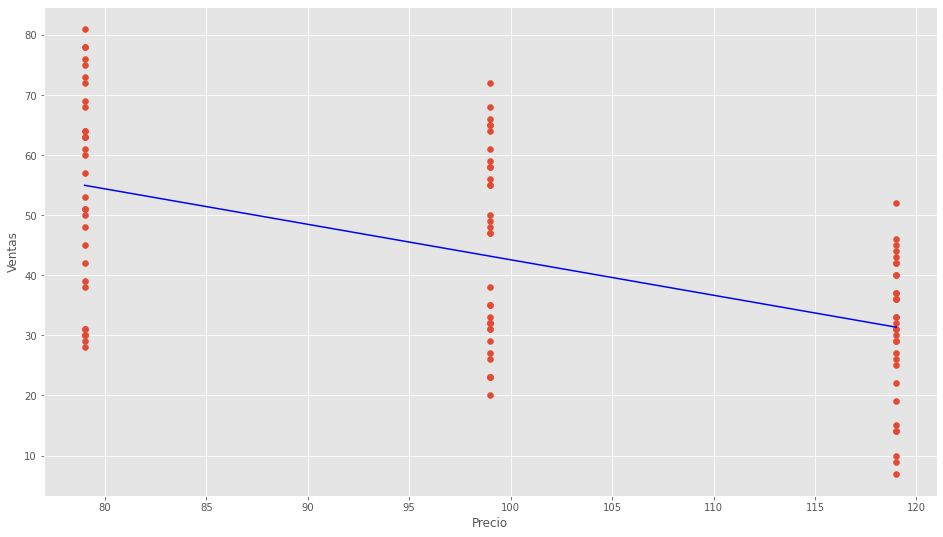

In [89]:
plt.scatter(x,y)
plt.plot(x,y_pred,color='blue')
plt.xlabel("Precio")
plt.ylabel("Ventas")
plt.show()

## Conclusiones

Uno de los criterios para determinar cuán bien se ajusta el modelo a nuestros datos, es el 
error cuadrático medio, cuyo valor fue muy grande, 221.11, lo ideal es que este valor sea lo más pequeño posible, por lo tanto, el modelo no es apropiado para los datos.